In [1]:
from numpy import *
import matplotlib.pyplot as plt

In [2]:
def graph_angles(u, v, ax, scale = 1/2, n =15):
    
    au = u.dot(v) / (linalg.norm(u)* linalg.norm(v))
    t = linspace(0, arccos(au), n)
    r = linalg.norm(u)*scale
    

    angle = matmul(u[newaxis].T ,r*cos(t)[newaxis]) + matmul(v[newaxis].T ,r*sin(t)[newaxis])
    ax.plot(*angle)
    return t



def red(u, v, w, a = 0, b = 3, step = 1):
    
    #Función que crea una red de puntos dados dos
    #vectores |u>, |v> y |w> 
    
    t1 = arange(a, b, step)
    t2 = arange(a, b, step)
    t3 = arange(a, b, step)
    
    t1,t2,t3 = meshgrid(t1, t2, t3)
    
    X = u[0]*t1+v[0]*t2+w[0]*t3 
    Y = u[1]*t1+v[1]*t2+w[1]*t3 
    Z = u[2]*t1+v[2]*t2+w[2]*t3

    return array([X, Y, Z])

def grilla(u,v,w, a = 0, b = 3, step = 1, ax = None, 
           alpha = 0.5, style = "-"):
    
    vectors = array([u,v,w])
    #Crea las lineas de toda la red. 
    
    for i, vec in enumerate(vectors):
        for m in arange(a, b, step):
            for n in arange(a, b, step):
                if i + 1 > 2:
                    j = 0
                else:
                    j = i + 1
                ax.plot(vectors[i-1][0]*n + vectors[j][0]*m + vec[0]*linspace(0,f-1), 
                        vectors[i-1][1]*n + vectors[j][1]*m + vec[1]*linspace(0,f-1), 
                        vectors[i-1][2]*n + vectors[j][2]*m + vec[2]*linspace(0,f-1), 
                        "Black", alpha = alpha, linestyle = style)

In [3]:

i, j, k = array([[1, 0, 0],
                [0, 1, 0],
                [0, 0, 1]])

A = 1

vectores1 = A * array([i,
                   j,
                   (i+j+k)/2])

vectores2 = A * array([(j + k - i)/2,
                   (k + i - j)/2,
                   (i + j - k)/2])

vectores3 = A * array([(j + k)/2,
                   (k + i)/2,
                   (i + j)/2])

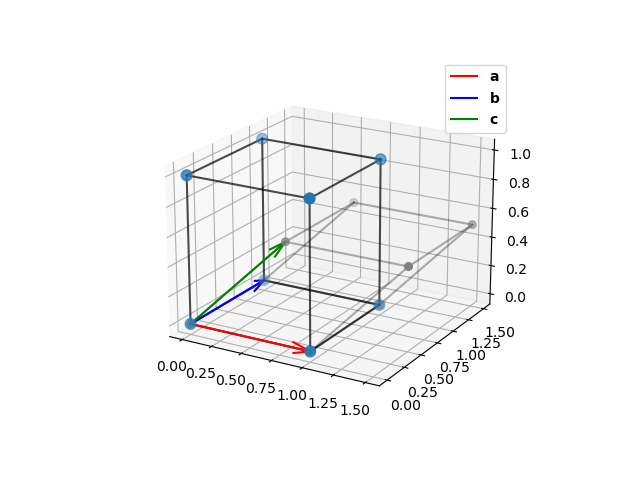

In [18]:
%matplotlib widget

f = 2 
g = 0

vectores = vectores1
#RED
x, y, z = red(*vectores, g, f, 1)

ax = plt.axes(projection = "3d")
#ax.axes.set_xlim3d(left=0, right=2) 
#ax.axes.set_ylim3d(bottom=0, top=2) 
#ax.axes.set_zlim3d(bottom=0, top=2) 


ax.scatter(*red(i,j,k,0,f,1), s = 60)
ax.scatter(x, y, z,s = 30, color = "gray")



o = [0,0,0]

colorvec = {"red": "$\mathbf{a}$", 
            "blue": "$\mathbf{b}$", 
            "green": "$\mathbf{c}$"}

#Gráfica de vectores base. 
for vec, col in zip(vectores, ["red", "blue", "green"]):
    ax.quiver(*o, *vec, color = col, arrow_length_ratio=0.15, 
              label = colorvec[col])

grilla(*vectores, g, f, 1, ax, alpha = 0.3,style= "-")
grilla(i, j, k, 0, f, 1, ax, 0.7,style =  "-")

#ax.set_axis_off()

ax.legend()

ax.view_init(20)

In [ ]:
def chichita(u,v,w, a = 0, b = 3, step = 1):
#RED
    x, y, z = red(u, v, w, a, b, step)

    ax = plt.axes(projection = "3d")
    #ax.axes.set_xlim3d(left=0, right=2) 
    #ax.axes.set_ylim3d(bottom=0, top=2) 
    #ax.axes.set_zlim3d(bottom=0, top=2) 

    ax.scatter(x, y, z)



    o = [0,0,0]

    #Gráfica de vectores base. 
    for vec, col in zip([u, v, w], ["red", "blue", "green"]):
        ax.quiver(*o, *vec, color = col)

    grilla(u, v, w, a, b, step, ax)

    #plt.title("SARAMABICHE")
    ax.view_init(20)
    plt.show()